In [1]:
import pandas as pd

# Data Preparation and Preprocessing

### Loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The dataset consists of 768 instances with 9 variables, where 8 are numerical input features, and 1 is a categorical output variable indicating the presence or absence of diabetes (0 for no, 1 for yes).

### NA values

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
df = data.iloc[:, :-1]

print((df[:] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


Since zero is not a valid value for the columns BloodPressure, SkinThickness, Insulin, BMI, Age, and Glucose, we consider them as missing values. However, for the column Pregnancies zero is an acceptable value. The biggest issue lies with the columns SkinThickness and Insulin, as they have a high percentage of missing values – SkinThickness (around 30%) and Insulin (around 50%). We will check their impact on the target variable in the further analysis.

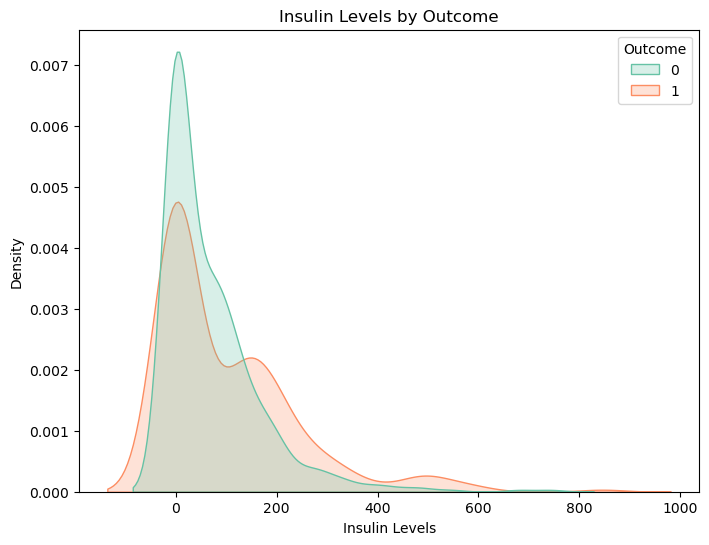

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Insulin', hue='Outcome', fill=True, common_norm=False, palette='Set2')
plt.title('Insulin Levels by Outcome')
plt.xlabel('Insulin Levels')
plt.ylabel('Density')
plt.show()


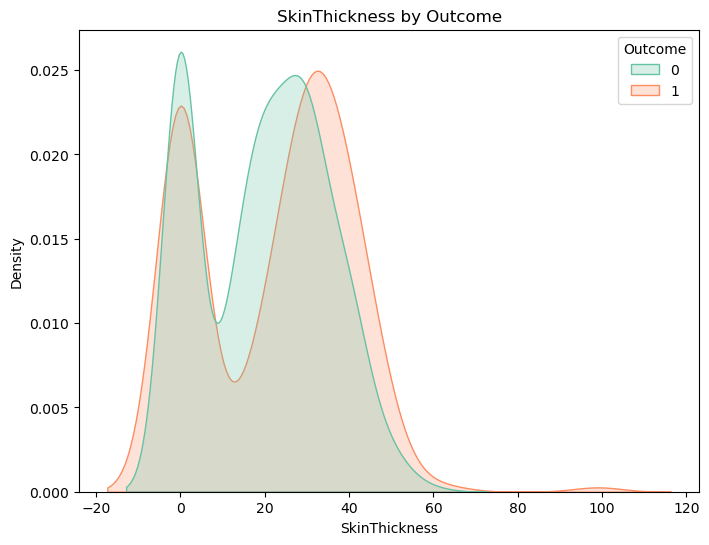

In [8]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='SkinThickness', hue='Outcome', fill=True, common_norm=False, palette='Set2')
plt.title('SkinThickness by Outcome')
plt.xlabel('SkinThickness')
plt.ylabel('Density')
plt.show()

Given that the distribution of the target variable is similar across the values of SkinThickness, and Insulin, we have decided to exclude these variables from the model development process. For example, upon examining the most recent plot, it is evident that, regardless of the measured skin thickness, there is an equal probability of the observations belonging to either of the two outcome groups.

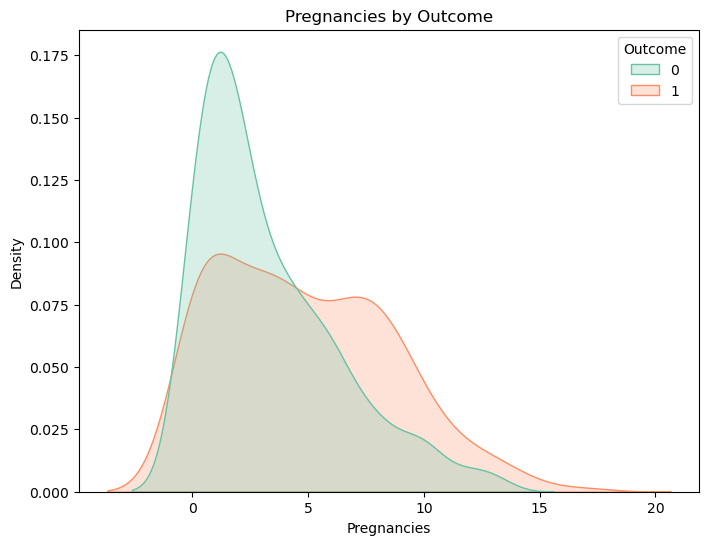

In [9]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Pregnancies', hue='Outcome', fill=True, common_norm=False, palette='Set2')
plt.title('Pregnancies by Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Density')
plt.show()

On the other hand, when examining the number of pregnancies, based on the diagram, it is evident that individuals who have not experienced pregnancy are more likely to not have diabetes.

Dropping selected columns

In [10]:

data = data.drop(columns=['SkinThickness', 'Insulin'])

print(data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
df = data.iloc[:, :-1]

print((df[:] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


Since the columns Glucose, Blood Pressure, and BMI have less than 5% missing values, we replace the missing entries with the median

In [12]:
median_value = data['Glucose'].median()
data['Glucose'] = data['Glucose'].replace(0, median_value)

median_value = data['BloodPressure'].median()
data['BloodPressure'] = data['BloodPressure'].replace(0, median_value)

median_value = data['BMI'].median()
data['BMI'] = data['BMI'].replace(0, median_value)


In [13]:
df = data.iloc[:, :-1]

print((df[:] == 0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


We have now addressed the missing values, removed the variables that will not be used for predictions, and before proceeding with model creation, the final step is to check for outliers

In [14]:
data

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


### Outliers

In [15]:
import pandas as pd
import numpy as np

df = data.iloc[:, :-1]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

print(outliers.sum())

Pregnancies                  4
Glucose                      0
BloodPressure               14
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
dtype: int64


Since the outliers account for less than 10% of the total instances, we will replace them with the median value.

In [16]:
for col in data.iloc[:, :-1].columns: 
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = data[col].median()
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median, data[col])


Checking outliers after replacement

In [17]:
import pandas as pd
import numpy as np

df = data.iloc[:, :-1]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

print(outliers.sum())

Pregnancies                  0
Glucose                      0
BloodPressure                0
BMI                          3
DiabetesPedigreeFunction    15
Age                          7
dtype: int64


Given that it is evident that, after replacing the outliers with the median, a small number (less than 3%) still remain, we have decided to remove the remaining outliers from the dataset, as this will not significantly reduce its size.

Deleting rest of outliers

In [18]:
for col in data.iloc[:, :-1].columns:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[col] < lower_bound) | (data[col] > upper_bound)

    data = data[~outliers] 

print(f"Data after removing outliers: {data.shape}")

Data after removing outliers: (743, 7)


Checking outliers after deleting

In [19]:
import pandas as pd
import numpy as np

df = data.iloc[:, :-1]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

print(outliers.sum())

Pregnancies                 0
Glucose                     0
BloodPressure               7
BMI                         1
DiabetesPedigreeFunction    3
Age                         9
dtype: int64


We will repeat this process as there are still a few outliers remaining, although they are minimal in number

In [20]:
for col in data.iloc[:, :-1].columns:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[col] < lower_bound) | (data[col] > upper_bound)

    data = data[~outliers] 

print(f"Data after removing outliers: {data.shape}")


Data after removing outliers: (723, 7)


In [21]:
import pandas as pd
import numpy as np

df = data.iloc[:, :-1]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

print(outliers.sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [22]:
print(f"Data after removing outliers: {data.shape}")

Data after removing outliers: (723, 7)


After handling the missing values and outliers, and selecting the columns to be used in the analysis, the dataset is now ready for model creation

In [23]:
data.to_csv('diabetes_preprocessed.csv', index=False)

print("Dataset has been saved as 'diabetes_preprocessed.csv'")

Dataset has been saved as 'diabetes_preprocessed.csv'
